In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb7e913b60509fb0b1fc7097ce6c2652


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | bossembele
City not found. Skipping...
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | casablanca
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | avera
Processing Record 15 of Set 1 | yulara
Processing Record 16 of Set 1 | sorong
Processing Record 17 of Set 1 | tougan
Processing Record 18 of Set 1 | haibowan
City not found. Skipping...
Processing Record 19 of Set 1 | pitimbu
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | punta arena

Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | cuamba
Processing Record 42 of Set 4 | mufulira
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | ust-karsk
Processing Record 45 of Set 4 | podporozhye
Processing Record 46 of Set 4 | port hawkesbury
Processing Record 47 of Set 4 | zyryanka
Processing Record 48 of Set 4 | bouza
Processing Record 49 of Set 4 | fortuna
Processing Record 50 of Set 4 | atasu
Processing Record 1 of Set 5 | haldibari
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | taylor
Processing Record 4 of Set 5 | edmundston
Processing Record 5 of Set 5 | kloulklubed
Processing Record 6 of Set 5 | stulovo
Processing Record 7 of Set 5 | muros
Processing Record 8 of Set 5 | sault sainte marie
Processing Record 9 of Set 5 | padang
Processing Record 10 of Set 5 | malanje
Processing Record 11 of Set 5 | kingseat
Processing Record 12 of Set 5 | katobu
Processing Record 13 of Set 5 | jeremie
Processing Recor

Processing Record 27 of Set 8 | lompoc
Processing Record 28 of Set 8 | saint anthony
Processing Record 29 of Set 8 | kang
Processing Record 30 of Set 8 | faanui
Processing Record 31 of Set 8 | katsina
Processing Record 32 of Set 8 | salta
Processing Record 33 of Set 8 | ribeira grande
Processing Record 34 of Set 8 | bolshiye uki
City not found. Skipping...
Processing Record 35 of Set 8 | nyurba
Processing Record 36 of Set 8 | kandrian
Processing Record 37 of Set 8 | mayumba
Processing Record 38 of Set 8 | adrar
Processing Record 39 of Set 8 | durant
Processing Record 40 of Set 8 | honiara
Processing Record 41 of Set 8 | vostok
Processing Record 42 of Set 8 | xining
Processing Record 43 of Set 8 | thinadhoo
Processing Record 44 of Set 8 | airai
Processing Record 45 of Set 8 | westpunt
City not found. Skipping...
Processing Record 46 of Set 8 | ponta delgada
Processing Record 47 of Set 8 | banjar
Processing Record 48 of Set 8 | biltine
Processing Record 49 of Set 8 | bokspits
City not fo

Processing Record 16 of Set 12 | brae
Processing Record 17 of Set 12 | toliary
City not found. Skipping...
Processing Record 18 of Set 12 | socorro
Processing Record 19 of Set 12 | manta
Processing Record 20 of Set 12 | labutta
City not found. Skipping...
Processing Record 21 of Set 12 | camacari
Processing Record 22 of Set 12 | norton shores
Processing Record 23 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 24 of Set 12 | gumla
Processing Record 25 of Set 12 | casay
Processing Record 26 of Set 12 | afonso bezerra
Processing Record 27 of Set 12 | ayagoz
Processing Record 28 of Set 12 | sao jose do belmonte
Processing Record 29 of Set 12 | marsa matruh
Processing Record 30 of Set 12 | ishigaki
Processing Record 31 of Set 12 | oshakati
Processing Record 32 of Set 12 | shingu
Processing Record 33 of Set 12 | mayo
Processing Record 34 of Set 12 | singapore
Processing Record 35 of Set 12 | berbera
Processing Record 36 of Set 12 | shiyan
Processing Record 37 of Set 12 | 

In [10]:
len(city_data)

573

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,61,75,26.46,AR,2021-01-26 20:09:12
1,Butaritari,3.0707,172.7902,80.35,76,94,5.75,KI,2021-01-26 20:16:18
2,Hobart,-42.8794,147.3294,53.01,66,20,12.66,AU,2021-01-26 20:13:25
3,Tasiilaq,65.6145,-37.6368,10.40,52,90,13.80,GL,2021-01-26 20:16:19
4,Port Elizabeth,-33.9180,25.5701,68.00,94,75,9.22,ZA,2021-01-26 20:11:30
5,Albany,42.6001,-73.9662,27.00,74,100,7.85,US,2021-01-26 20:13:08
6,Rikitea,-23.1203,-134.9692,80.02,70,43,12.88,PF,2021-01-26 20:13:51
7,Casablanca,33.5928,-7.6192,60.80,94,0,9.22,MA,2021-01-26 20:15:09
8,Coquimbo,-29.9533,-71.3436,66.20,72,40,11.50,CL,2021-01-26 20:13:57
9,Avarua,-21.2078,-159.7750,84.20,70,72,16.11,CK,2021-01-26 20:11:24


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-01-26 20:09:12,-54.8000,-68.3000,44.60,61,75,26.46
1,Butaritari,KI,2021-01-26 20:16:18,3.0707,172.7902,80.35,76,94,5.75
2,Hobart,AU,2021-01-26 20:13:25,-42.8794,147.3294,53.01,66,20,12.66
3,Tasiilaq,GL,2021-01-26 20:16:19,65.6145,-37.6368,10.40,52,90,13.80
4,Port Elizabeth,ZA,2021-01-26 20:11:30,-33.9180,25.5701,68.00,94,75,9.22
5,Albany,US,2021-01-26 20:13:08,42.6001,-73.9662,27.00,74,100,7.85
6,Rikitea,PF,2021-01-26 20:13:51,-23.1203,-134.9692,80.02,70,43,12.88
7,Casablanca,MA,2021-01-26 20:15:09,33.5928,-7.6192,60.80,94,0,9.22
8,Coquimbo,CL,2021-01-26 20:13:57,-29.9533,-71.3436,66.20,72,40,11.50
9,Avarua,CK,2021-01-26 20:11:24,-21.2078,-159.7750,84.20,70,72,16.11


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

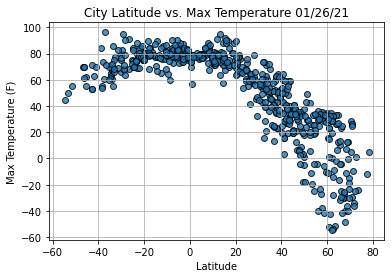

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

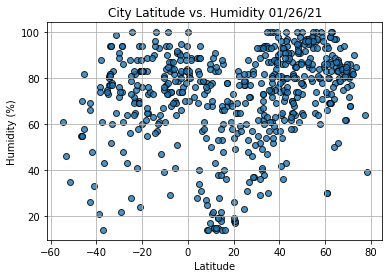

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

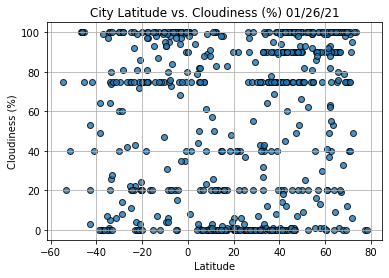

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

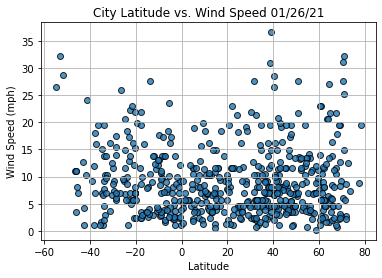

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Sorong
Country                        ID
Date          2021-01-26 20:16:20
Lat                       -0.8833
Lng                        131.25
Max Temp                    76.95
Humidity                       90
Cloudiness                    100
Wind Speed                   5.57
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
568     True
569    False
570    False
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2021-01-26 20:16:18,3.0707,172.7902,80.35,76,94,5.75
3,Tasiilaq,GL,2021-01-26 20:16:19,65.6145,-37.6368,10.40,52,90,13.80
5,Albany,US,2021-01-26 20:13:08,42.6001,-73.9662,27.00,74,100,7.85
7,Casablanca,MA,2021-01-26 20:15:09,33.5928,-7.6192,60.80,94,0,9.22
11,Avera,US,2021-01-26 20:16:19,33.1940,-82.5271,71.60,94,90,5.75


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

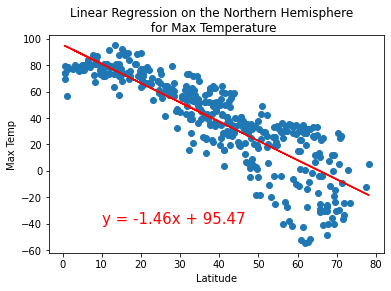

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.suptitle("Linear Regression on the Northern Hemisphere\n for Max Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

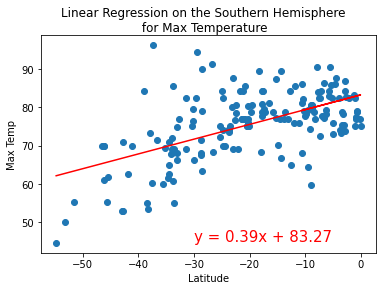

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.suptitle("Linear Regression on the Southern Hemisphere\n for Max Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,45))

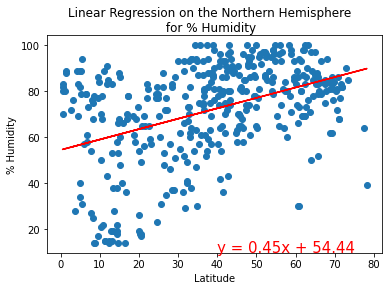

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.suptitle("Linear Regression on the Northern Hemisphere\n for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

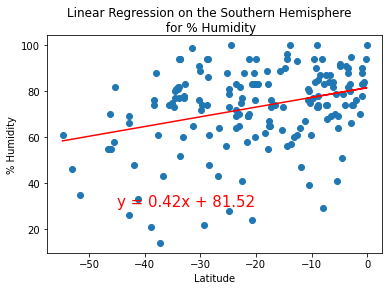

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.suptitle("Linear Regression on the Southern Hemisphere\n for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-45,30))

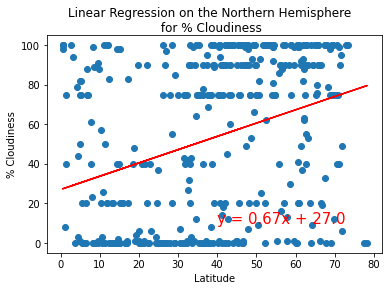

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.suptitle("Linear Regression on the Northern Hemisphere\n for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))



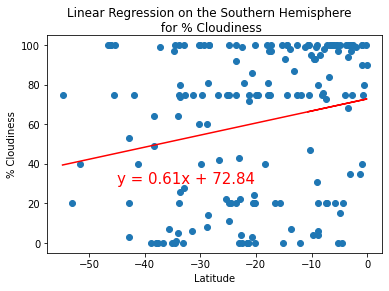

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.suptitle("Linear Regression on the Southern Hemisphere\n for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-45,30))

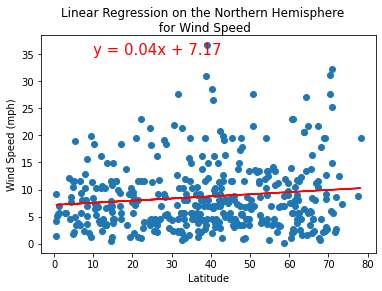

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.suptitle("Linear Regression on the Northern Hemisphere\n for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed (mph)',(10,35))



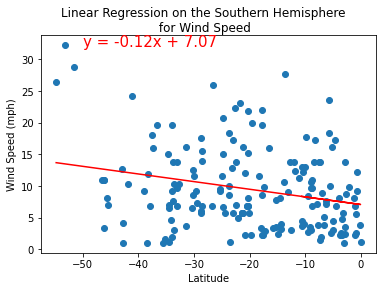

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.suptitle("Linear Regression on the Southern Hemisphere\n for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed (mph)',(-50,32))